In [29]:
import tensorflow as tf
import numpy as np
import pandas as pd
import scanpy as sc
from deepimpute.multinet import MultiNet  #deepImpute

sc.set_figure_params(scanpy=True, dpi=30)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Preparation

In [30]:
adata = sc.read_10x_mtx(
    '/Volumes/Samsung_T5/ResearchData/scanpyTutorial/data/filtered_gene_bc_matrices/hg19',  # the directory with the `.mtx` file
    var_names='gene_symbols',                      # use gene symbols for the variable names (variables-axis index)
    cache=True)

adata.var_names_make_unique()

In [31]:
data = pd.DataFrame.sparse.from_spmatrix(adata.X)
print('Working on {} cells and {} genes'.format(*data.shape))

Working on 2700 cells and 32738 genes


# Testing DeepImpute

In [34]:
# Using default parameters
multinet = MultiNet()

# Using custom parameters
NN_params = {
        'learning_rate': 1e-4,
        'batch_size': 64,
        'max_epochs': 500,
        'ncores': 5,
        'sub_outputdim': 512,
        'architecture': [
            {"type": "dense", "activation": "relu", "neurons": 256},
            {"type": "dropout", "activation": "dropout", "rate": 0.2}]
    }

multinet = MultiNet(**NN_params)

Using all the cores (8)


In [35]:
# Using all the data
multinet.fit(data,cell_subset=1,minVMR=0.5)

# Using 80% of the data
#multinet.fit(data,cell_subset=0.5)

# Using 200 cells (randomly selected)
#multinet.fit(data,cell_subset=200)

# Custom fit
#trainingData = data.iloc[100:250,:]
#multinet.fit(trainingData)

 dense_14_loss: 0.0678 - dense_15_loss: 0.0767 - val_loss: 0.2204 - val_dense_12_loss: 0.0597 - val_dense_13_loss: 0.0520 - val_dense_14_loss: 0.0524 - val_dense_15_loss: 0.0563
Epoch 9/500
41/41 [==============================] - 0s 9ms/step - loss: 0.2829 - dense_12_loss: 0.0804 - dense_13_loss: 0.0625 - dense_14_loss: 0.0657 - dense_15_loss: 0.0743 - val_loss: 0.2170 - val_dense_12_loss: 0.0585 - val_dense_13_loss: 0.0515 - val_dense_14_loss: 0.0516 - val_dense_15_loss: 0.0555
Epoch 10/500
41/41 [==============================] - 0s 9ms/step - loss: 0.2752 - dense_12_loss: 0.0778 - dense_13_loss: 0.0612 - dense_14_loss: 0.0639 - dense_15_loss: 0.0723 - val_loss: 0.2139 - val_dense_12_loss: 0.0578 - val_dense_13_loss: 0.0509 - val_dense_14_loss: 0.0505 - val_dense_15_loss: 0.0547
Epoch 11/500
41/41 [==============================] - 0s 9ms/step - loss: 0.2688 - dense_12_loss: 0.0761 - dense_13_loss: 0.0597 - dense_14_loss: 0.0625 - dense_15_loss: 0.0705 - val_loss: 0.2117 - val_dense

In [36]:
# IMPUTATION
imputedData = multinet.predict(data)

Filling zeros


(0.0, 100.0)

(0.0, 100.0)

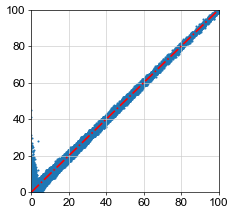

In [37]:
import matplotlib.pyplot as plt
import numpy as np

limits = [0,100]

fig,ax = plt.subplots()

jitter = np.random.normal(0,1,data.size) # Add some jittering to better see the point density
ax.scatter(data.values.flatten()+jitter,imputedData.values.flatten(),s=2)
ax.plot(limits,limits,'r-.',linewidth=2)
ax.set_xlim(limits)
ax.set_ylim(limits)

plt.show()

In [38]:
# Scoring
# Display training metrics (MSE and Pearson's correlation on the test data)
multinet.test_metrics

{'correlation': 0.8880724546248184, 'MSE': 0.12687596897211537}

In [ ]:
# Ouput pandas dataframe as .mtx format 
import scipy.io, scipy.sparse
df = pd.DataFrame({"A": [1,2], "B": [3,0]})
scipy.io.mmwrite("/Volumes/Samsung_T5/ResearchData/scanpyTutorial/Rdata/filtered_gene_bc_matrices/hg19/example.mtx", df)